# Data Analysis Google Data

In [1]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Read in data
Here, I read in two files:
* all the google assistent logs provided to me by a friend -> voice_inputs
* a file containing the inputs I classified as private -> private_convos

In [3]:
voice_inputs = list()
flag = False
with open("AssistantVerlauf_Valentin.csv", encoding="utf-8") as f:
    for line in f:
        lline = line.split()
        if flag:
            if lline[-1] == "gesagt": # exclude the "gesagt" at the end of each log
                line = line.lower()
                voice_inputs.append(line[:-8])
        if line == "Google Assistant\n":
            flag = True
        else:
            flag = False

private_convos = list()
with open("google_private_convos.txt", encoding="utf-8") as g:
    for line in g:
        line = line.strip()
        line = line.lower()
        private_convos.append(line)
print(len(voice_inputs), len(set(voice_inputs)), len(private_convos))

590 322 21


## Create embeddings
Embeddings are created with the SentenceTransformer (Reimers and
Gurevych, 2019)

In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")
# model = SentenceTransformer("distiluse-base-multilingual-cased-v1")
embeddings = model.encode(voice_inputs)

## Create dataframe
The dataframe includes all input sentences (326) as well as their embeddings (vectors of length 384).

In [5]:
data = dict()
for sentence, embedding in zip(voice_inputs, embeddings):
    data[sentence] = embedding

sentences = list(data.keys())
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
spiele nachrichten,-0.063686,0.049910,0.013943,-0.038185,-0.058667,0.069254,0.063378,-0.004743,-0.003047,-0.018149,...,-0.001764,0.000965,0.020219,-0.049705,-0.018641,-0.013594,0.063307,0.024613,0.008432,0.043110
descendants,-0.039261,-0.001042,-0.030951,-0.013451,-0.053347,-0.014213,0.008040,-0.005079,0.031617,0.014342,...,0.016334,-0.101578,0.004238,0.028121,-0.005555,0.078942,0.182486,0.053002,0.069484,0.010878
stell einen timer auf 10 minuten,-0.074005,0.070900,-0.008909,-0.022890,-0.048566,0.091232,0.075807,0.089604,0.066908,-0.113798,...,0.003474,0.053961,0.056659,-0.084883,-0.079367,0.061844,-0.032153,0.120641,0.027353,0.014790
navigiere zur lessingstraße in saarbrücken,0.021619,0.170627,0.015393,-0.013930,-0.039682,0.079329,-0.015321,0.030125,-0.027336,-0.041337,...,-0.077582,0.023341,0.031896,-0.012417,-0.048609,-0.003141,0.041759,-0.043282,-0.027766,0.046546
stelle einen timer auf 10 minuten,-0.058300,0.089796,-0.027804,-0.024913,-0.061850,0.087005,0.064062,0.081465,0.062182,-0.103406,...,0.009233,0.053663,0.046203,-0.082358,-0.072617,0.054808,-0.035208,0.112138,0.018191,0.001168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
woher kommt der begriff anschwärzen,-0.090010,0.055295,0.018254,0.048239,-0.040754,0.036241,0.058530,0.095530,0.017909,0.008639,...,-0.020139,-0.026613,0.056886,-0.002659,-0.035215,-0.077910,0.048044,0.004588,0.047596,0.032860
wo liegt der wert von ea,-0.006836,0.132749,-0.033143,-0.019992,0.021164,0.026036,0.123623,0.019456,0.099695,0.005064,...,0.043781,0.011711,-0.014287,-0.065710,-0.020169,-0.069370,-0.000587,-0.049995,0.088252,0.033533
stelle einen timer bis 25 minuten,-0.035846,0.096663,-0.033406,-0.063863,-0.110339,0.046873,0.071693,0.069469,0.076979,-0.061944,...,0.028087,0.073302,0.032756,-0.079015,-0.039870,0.038244,-0.034319,0.042808,0.003339,-0.014090
richte mir eine erinnerung ein für den 26.10 20 uhr,-0.058103,0.042296,0.016865,0.061343,-0.026967,0.074190,0.025825,0.072988,0.021730,-0.053136,...,-0.011290,0.104033,-0.030223,-0.051370,-0.024554,0.013918,0.060494,0.031625,-0.067582,0.027327


## Calculate sensitive data proportion
See how many of the recorded utterances where recorded accidentally

[21, 268, 301]


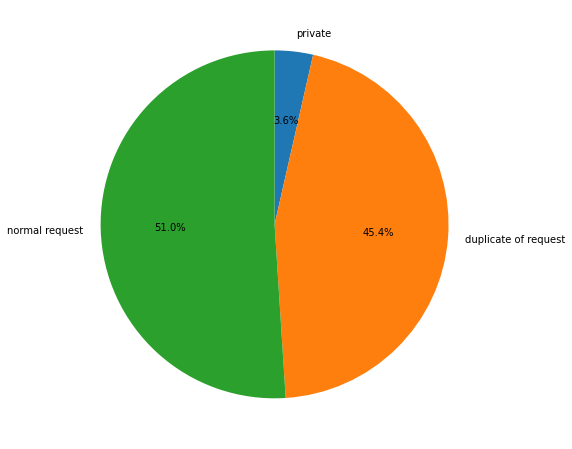

In [6]:
sentype = list()
words = list()
for sen in voice_inputs:
    if sen in private_convos:
        sentype.append("private")
    else:
        if sen in words:
            sentype.append("duplicate of request")
        else:
            sentype.append("normal request")
            words.append(sen)

prop = [sentype.count("private"), sentype.count("duplicate of request"), sentype.count("normal request")]
print(prop)
labels = ["private", "duplicate of request", "normal request"]
fig = plt.figure(figsize=(8,8))
plot = plt.pie(prop, labels = labels, startangle=90, counterclock=False, textprops={"fontsize":10}, autopct = '%.1f%%')
fig.savefig('proportions_google.jpg', bbox_inches='tight', dpi=150)

## Standardize Data
Standardizing the Data for the PCA

In [7]:
x = StandardScaler().fit_transform(df)
embeddingsdataframe = pd.DataFrame(x)
embeddingsdataframe.index = sentences
embeddingsdataframe

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
spiele nachrichten,-0.517818,-0.649692,0.318912,-0.991234,-0.508936,0.599497,-0.092481,-1.203140,-0.487079,0.087002,...,-0.308977,-0.644471,0.075362,-0.605676,0.740662,-0.390662,0.732909,0.172623,-0.104978,1.229761
descendants,0.084454,-1.811735,-0.721727,-0.344017,-0.399698,-1.555813,-1.271558,-1.210927,0.308024,0.852693,...,0.119418,-2.880031,-0.369971,1.348575,1.106051,2.184058,3.157123,0.800319,1.299146,0.342946
stell einen timer auf 10 minuten,-0.772264,-0.170986,-0.210805,-0.591017,-0.301542,1.167042,0.172339,0.985133,1.117517,-2.167140,...,-0.185002,0.510899,1.090756,-1.489027,-0.955040,1.708333,-1.208839,2.295907,0.330169,0.450577
navigiere zur lessingstraße in saarbrücken,1.585581,2.103449,0.352525,-0.356557,-0.119150,0.859673,-1.769308,-0.394411,-1.044212,-0.459479,...,-2.103694,-0.156650,0.400745,0.330627,-0.096174,-0.099827,0.294596,-1.328622,-0.937501,1.324316
stelle einen timer auf 10 minuten,-0.384998,0.259964,-0.648774,-0.643933,-0.574273,1.057892,-0.077913,0.796355,1.009130,-1.922245,...,-0.048678,0.504400,0.799401,-1.425614,-0.766560,1.512565,-1.270997,2.107906,0.119461,0.075786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
woher kommt der begriff anschwärzen,-1.166889,-0.526866,0.418844,1.270163,-0.141154,-0.252978,-0.195777,1.122578,-0.006395,0.718295,...,-0.743948,-1.245714,1.097074,0.575669,0.277846,-2.180182,0.422432,-0.270159,0.795745,0.947750
wo liegt der wert von ea,0.883968,1.239577,-0.772545,-0.515183,1.130067,-0.516494,1.191158,-0.641871,1.869576,0.634043,...,0.769116,-0.410194,-0.886167,-1.007576,0.698000,-1.942584,-0.566766,-1.477060,1.730780,0.966279
stelle einen timer bis 25 minuten,0.168651,0.416584,-0.778629,-1.663119,-1.569805,0.021569,0.084679,0.518118,1.348533,-0.945126,...,0.397622,0.932567,0.424693,-1.341669,0.147855,1.051680,-1.252911,0.574934,-0.222113,-0.344015
richte mir eine erinnerung ein für den 26.10 20 uhr,-0.380141,-0.823332,0.386634,1.613054,0.141893,0.726970,-0.892619,0.599738,0.081240,-0.737529,...,-0.534466,1.602536,-1.330220,-0.647493,0.575537,0.374827,0.675690,0.327655,-1.853228,0.795514


## Dimensionality Reduction
Performing the PCA-Algorithm, reducing the embeddings dimensions from 384 to 2 in order to gain a nice visual representation of the inputs.

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.index = sentences
principalDf

,principal component 1,principal component 2
spiele nachrichten,-3.750953,-6.130625
descendants,-3.499496,-0.629433
stell einen timer auf 10 minuten,15.536218,-0.612225
navigiere zur lessingstraße in saarbrücken,-2.846065,-9.651804
stelle einen timer auf 10 minuten,15.829771,-1.676221
...,...,...
woher kommt der begriff anschwärzen,-2.802301,-2.068233
wo liegt der wert von ea,-0.244325,5.008826
stelle einen timer bis 25 minuten,14.555099,-2.448772
richte mir eine erinnerung ein für den 26.10 20 uhr,2.157587,3.598815


## Adding manual annotation
Adding the manual annotations to the dataframe

In [9]:
private = list()
for sen in sentences:
    if sen in private_convos:
        private.append(True)
    else:
        private.append(False)
print(private.count(True))
finalDf = principalDf
finalDf['private'] = private
finalDf

21


,principal component 1,principal component 2,private
spiele nachrichten,-3.750953,-6.130625,False
descendants,-3.499496,-0.629433,False
stell einen timer auf 10 minuten,15.536218,-0.612225,False
navigiere zur lessingstraße in saarbrücken,-2.846065,-9.651804,False
stelle einen timer auf 10 minuten,15.829771,-1.676221,False
...,...,...,...
woher kommt der begriff anschwärzen,-2.802301,-2.068233,False
wo liegt der wert von ea,-0.244325,5.008826,False
stelle einen timer bis 25 minuten,14.555099,-2.448772,False
richte mir eine erinnerung ein für den 26.10 20 uhr,2.157587,3.598815,False


## Plot PCA

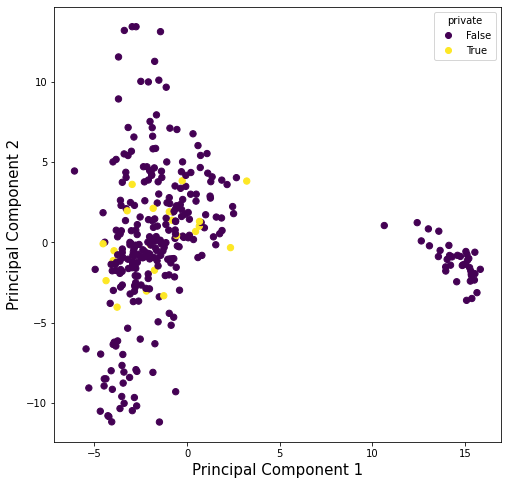

In [10]:
#fig = plt.figure(figsize = (25,30))
fig = plt.figure(figsize=(8,8))
scatter = plt.scatter(finalDf["principal component 1"], finalDf["principal component 2"], c = finalDf["private"], s = 40)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=[False, True],
           title="private")
# annotations = sentences
# for i, label in enumerate(annotations):
#     plt.annotate(label, (finalDf["principal component 1"][i], finalDf["principal component 2"][i]))
fig.savefig('PCAplot.jpg', bbox_inches='tight', dpi=150)

## K-Means Clustering
Clustering the reduced dimensions with k-means

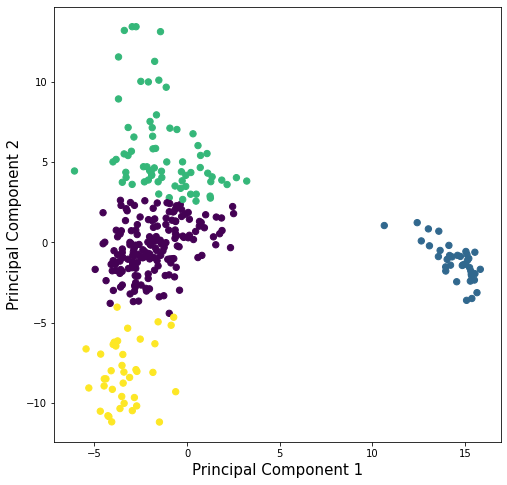

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

# fig = plt.figure(figsize = (25,30))
fig = plt.figure(figsize = (8,8))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
scatter2 = plt.scatter(finalDf["principal component 1"], finalDf["principal component 2"], c=y_kmeans, s=40, cmap='viridis')
annotations = sentences
# for i, label in enumerate(annotations):
    # plt.annotate(label, (finalDf["principal component 1"][i], finalDf["principal component 2"][i]))
fig.savefig('PCAplot2.jpg', bbox_inches='tight', dpi=150)

## Cluster
* top -> navigation
* middle -> random requests
* bottom -> questions, time, weather
* right -> setting timers

In [16]:
eval = list()
for i in zip(finalDf.index, y_kmeans, list(finalDf["private"])):
    eval.append((i[1], i[2]))

In [17]:
tp = sum([1 for i,j in eval if j and i == 0])
fn = sum([1 for i,j in eval if j and i != 0])
fp = sum([1 for i,j in eval if j == False and i == 0])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = (2 * precision * recall) / (precision + recall)
print(tp, fn, fp, precision, recall, fscore)

17 4 157 0.09770114942528736 0.8095238095238095 0.17435897435897435
